In [1]:
%matplotlib inline

In [2]:
import os
from pathlib import Path

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [3]:
data_path = Path(os.getcwd()).parent/"data"

df = pd.read_csv(data_path/"gbm-data.csv")

In [4]:
def save_ans(*ans, delimiter=" "):
    with open(data_path.parent/"res.txt", "w") as f:
        f.write(delimiter.join(map(str, ans)))

In [5]:
df.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X = df.iloc[:, 1:].to_numpy()
y = df["Activity"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.8,
                                                    random_state=241)

Training with lr=1
      Iter       Train Loss   Remaining Time 
         1           1.0190           19.27s
         2           0.9192           15.69s
         3           0.8272           14.62s
         4           0.7834           14.27s
         5           0.7109           13.72s
         6           0.6368           13.20s
         7           0.5797           12.70s
         8           0.5610           12.37s
         9           0.5185           12.84s
        10           0.4984           12.86s
        20           0.1999           10.81s
        30           0.1313            9.90s
        40           0.0790            9.17s
        50           0.0511            8.67s
        60           0.0352            8.08s
        70           0.0245            7.54s
        80           0.0162            7.04s
        90           0.0114            6.58s
       100           0.0077            6.14s
       200           0.0002            1.98s

Training with lr=0.5
      Iter   

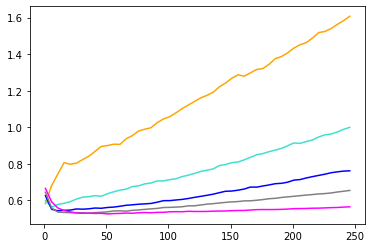

In [8]:
losses = []
lrs = [1, 0.5, 0.3, 0.2, 0.1]
colors = ["orange", "turquoise", "blue", "gray", "magenta"]

plt.figure()

for e, lr in enumerate(lrs):
    print(f"Training with lr={lr}")
    clf = GradientBoostingClassifier(n_estimators=250,
                                     verbose=True,
                                     random_state=241,
                                     learning_rate=lr)
    clf.fit(X_train, y_train)
    res = np.zeros((clf.n_estimators_, ), dtype=np.float64)

    for i, y_pred in enumerate(clf.staged_predict_proba(X_test)):
        res[i] = log_loss(y_test, y_pred)

    losses.append(res)

    plt.plot((np.arange(res.shape[0]) + 1)[::5], res[::5],
             "-",
             color=colors[e],
             label=lr)
    print()

plt.show()

In [9]:
save_ans("overfitting")

In [10]:
losses[3].min(), losses[3].argmin()

(0.5301645204906471, 36)

In [11]:
save_ans(np.around(losses[3].min(), 2), losses[3].argmin())

In [12]:
clf = RandomForestClassifier(n_estimators=36, random_state=241)
clf.fit(X_train, y_train)

loss = log_loss(y_test, clf.predict_proba(X_test))
loss

0.5415685811957381

In [13]:
save_ans(np.around(loss, 2))